In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


[*********************100%***********************]  5 of 5 completed


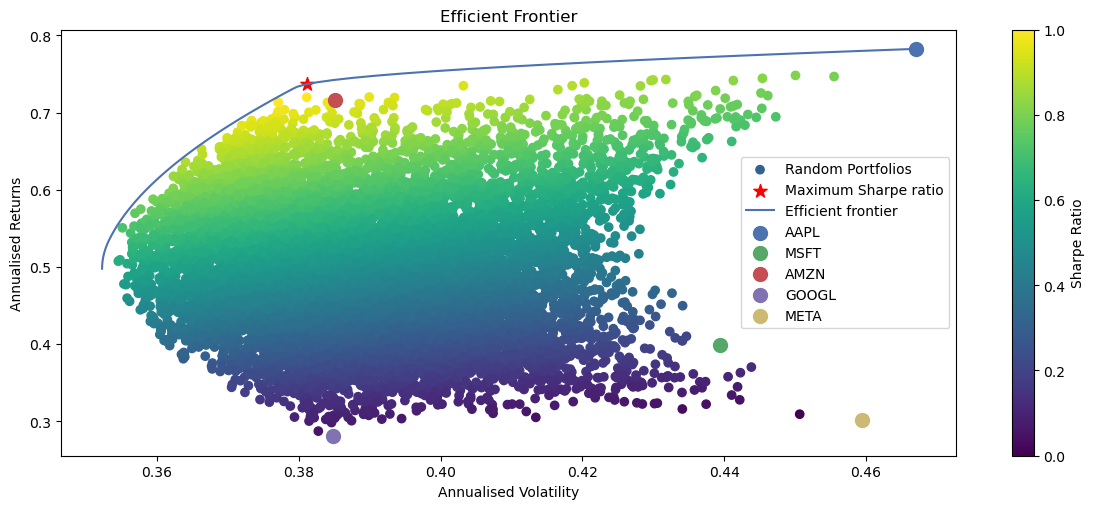

OrderedDict([('AAPL', 0.31472), ('AMZN', 0.68528), ('GOOGL', 0.0), ('META', 0.0), ('MSFT', 0.0)])
Expected annual return: 73.7%
Annual volatility: 38.1%
Sharpe Ratio: 1.88
Expected annual return: 0.74
Annual volatility: 0.38
Sharpe Ratio: 1.88


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import yfinance as yf

# Initialise Plot
plt.figure(figsize=(12, 5))

# Fetch historical price data
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "META"]
prices = yf.download(tickers, start="2020-01-01", end="2021-01-01")["Adj Close"]

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

# Set up the Efficient Frontier object
ef = EfficientFrontier(mu, S)

# Calculate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
vols = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / vols

# Plotting random portfolios
plt.scatter(vols, rets, c=sharpes, cmap='viridis', label='Random Portfolios')

# Find the maximum Sharpe ratio portfolio
ef_max_sharpe = EfficientFrontier(mu, S)
sharpe_pwt = ef_max_sharpe.max_sharpe()
ret_sharpe, vol_sharpe, _ = ef_max_sharpe.portfolio_performance()
plt.scatter(vol_sharpe, ret_sharpe, marker='*', color='r', s=100, label='Maximum Sharpe ratio')

# Plot the efficient frontier
plotting.plot_efficient_frontier(ef, ax=plt.gca(), show_assets=False)

# Highlight the assets
for ticker in tickers:
    plt.scatter(np.sqrt(S.loc[ticker, ticker]), mu[ticker], marker='o', s=100, label=ticker)
    


# Show the plot
plt.title('Efficient Frontier')
plt.xlabel('Annualised Volatility')
plt.ylabel('Annualised Returns')
plt.legend()
plt.colorbar(label='Sharpe Ratio')
plt.show()

# Recreate the EfficientFrontier object to find the maximum Sharpe portfolio weights
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# Calculate the expected performance 
performance = ef.portfolio_performance(verbose=True)


# Print
print(f"Expected annual return: {performance[0]:.2f}")
print(f"Annual volatility: {performance[1]:.2f}")
print(f"Sharpe Ratio: {performance[2]:.2f}")